**Задание 1**
Скачайте с сайта https://grouplens.org/datasets/movielens/ датасет любого размера. Определите какому фильму было выставлено больше всего оценок 5.0.


In [1]:
import pandas as pd

In [58]:
data = pd.read_csv('ratings.csv')
print('movie\tcount')
x=data[data['rating']==5.0]['movieId'].value_counts().head(1)
print(x)

movie	count
318    153
Name: movieId, dtype: int64


**Задание 2**
По данным файла power.csv посчитайте суммарное потребление стран Прибалтики (Латвия, Литва и Эстония) категорий 4, 12 и 21 за период с 2005 по 2010 года. Не учитывайте в расчетах отрицательные значения quantity.

In [132]:
df = pd.read_csv('power.csv')
selection = df[((df['country']=='Latvia') | (df['country']=='Lithuania') | (df['country']=='Estonia'))]
x = selection[((selection['quantity'] > 0) 
               & (selection['year'] >= 2005) & (selection['year'] <= 2010)
               &((selection['category'] ==4)| (selection['category'] ==12) | (selection['category'] ==21)))]
print('Cуммарное потребление стран Прибалтики: ', int(sum(x['quantity'])))

Cуммарное потребление стран Прибалтики  240580


**Задание 3**
Выберите страницу любого сайта с табличными данными. Импортируйте таблицы в pandas dataframe.
Примеры страниц (необязательно брать именно эти):
https://fortrader.org/quotes
https://www.finanz.ru/valyuty/v-realnom-vremeni

In [86]:
page_url = 'http://www.pk.rusoil.net/page/minimalnoe-kolichestvo-ballov'
table = pd.read_html(page_url, encoding='utf-8')
table[1:]

[                    0                              1
 0            Предметы  Минимальное количество баллов
 1          Математика                             39
 2        Русский язык                             40
 3              Физика                             40
 4               Химия                             40
 5   Информатика и ИКТ                             42
 6      Обществознание                             44
 7             История                             40
 8          Литература                             40
 9            Биология                             40
 10       ИТН-1, ИТН-2                             30
 11       ИТН-3, ИТН-4                             26
 12                ПИТ                             26]

**Задание 4**
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

Если исмользовать данное условие оценки, то пропадую значения рейтинга от 4 до 4,5. Поэтому введем следующие критерии
- оценка до 2 - низкий рейтинг
- оценка от 2 до 4,5 - средний рейтинг
- оценка от 4.5 - высокий рейтинг

In [131]:
def classification(rating):
    if rating <= 2:
        return 'Низкий рейтинг'
    elif 2 < rating <= 4.5:
        return 'Средний рейтинг'
    elif 4.5 < rating <= 5:
        return 'Высокий рейтинг'

data['class'] = data['rating'].apply(classification)
data.head()

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,Средний рейтинг
1,1,3,4.0,964981247,Средний рейтинг
2,1,6,4.0,964982224,Средний рейтинг
3,1,47,5.0,964983815,Высокий рейтинг
4,1,50,5.0,964982931,Высокий рейтинг


**Задание 5**
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [154]:
kw = pd.read_csv('keywords.csv')

In [155]:
geo_data = {'Центр': ['москва', 'тула', 'ярославль'], 
            'Северо-Запад': ['петербург', 'псков', 'мурманск'], 
            'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск'] }

In [156]:
def geo_classification(x):
    for region, city in geo_data.items():
        if x in city:
            return region
    return 'undefined'

In [157]:
kw['region'] = kw['keyword'].apply(geo_classification)
kw[(kw['region'] == 'Центр')]

,keyword,shows,region
1259,москва,153050,Центр
6075,ярославль,41720,Центр
11785,тула,23898,Центр


In [158]:
kw['region'] = kw['keyword'].apply(geo_classification)
kw[(kw['region'] == 'Северо-Запад')]

,keyword,shows,region
8977,мурманск,29984,Северо-Запад
11222,псков,24885,Северо-Запад
20823,петербург,14859,Северо-Запад


In [159]:
kw['region'] = kw['keyword'].apply(geo_classification)
kw[(kw['region'] == 'Дальний Восток')]

,keyword,shows,region
5858,владивосток,43038,Дальний Восток
9084,хабаровск,29655,Дальний Восток
21445,сахалин,14494,Дальний Восток


In [161]:
kw['region'] = kw['keyword'].apply(geo_classification)
kw.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


**Задание 6**
Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

- для каждой строки пройдите по всем годам списка years
- если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
- если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [258]:
data_ratings=pd.read_csv('ratings.csv')
data_movies=pd.read_csv('movies.csv')
years = list(range(1950, 2011))

In [259]:
def production_year(film):
    value=[x for x in years if str(x) in film['title']]
    if value:
        return value[0]
    else:
        return 1900       

In [262]:
data_movies['year']=data_movies.apply(production_year, axis=1)
a=data_movies.merge(data_ratings, on='movieId')
x=a.groupby('year').rating.mean().reset_index()
x.sort_values('rating', ascending=False)

,year,rating
8,1957,4.039535
5,1954,4.009191
13,1962,3.969466
3,1952,3.953125
23,1972,3.944293
...,...,...
51,2000,3.398922
56,2005,3.359976
43,1992,3.353555
48,1997,3.347241


По полученной таблице плохо прослеживается зависимость среднего рейтинга от года. Поэтому для наглядности построим график.Исключим 1900 потому, что точный год выпуска не известен (по условию)

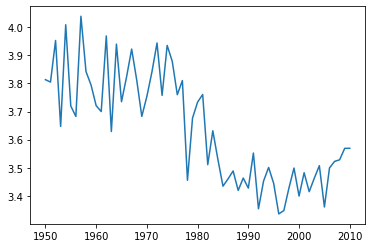

In [261]:
import matplotlib.pyplot as plt 

mounted=x[x['year']!=1900] 
plt.plot(mounted['year'], mounted['rating'])

Я думаю, что такая зависимость обусловлена не годом как таковым, а тем, что сейчас модно сильно критиковать все подряд. 
Также думаю,что существует зависимость между возрастом и рейтингом, впечатлительная молодежь составляет меньшую долю из общей массы, потому что более старшее поколение сравнивают фильмы До и После, и повторения основной линии сюжета не оценивают высоко. 
Но такую же мысль можно посмотреть с другой стороны. Чем больше фильмов просмотрел зритель, тем тяжелее его впечатлить, тем ниже оценку он (зритель) может поставить. 
Но вообще о вкусах не спорят. Кому-то одинвакого нравлятся новые и старые фильмы, но определенного жанра (комедия, детектив, драма и т.д).
В общем, есть много субъективных и объективных факторов оценки того или иного фильма, которые надо учитывать. Но абсолютно точных критериев, к сожалению или счастью, нет.